## Basic ML Flow

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/Users/cwbenton/MATH4140/datasets/adult.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
              'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
              'hours_per_week', 'native_country', 'income']
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# organize your target variable
# df['income'] is the target variable
df['income_binary']=1
df.loc[df['income'].str.contains("<=50K"),'income_binary']=0
df.drop('income',inplace=True,axis=1)

target = df['income_binary']
features = df.drop(['income_binary'],axis=1)

In [6]:
target

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income_binary, Length: 32561, dtype: int64

In [7]:
features

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [8]:
# Creating a sample test dataset - not always required
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [9]:
#identify categorical and continuous variables and separate them
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26048 entries, 5514 to 23654
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26048 non-null  int64 
 1   workclass       26048 non-null  object
 2   fnlwgt          26048 non-null  int64 
 3   education       26048 non-null  object
 4   education_num   26048 non-null  int64 
 5   marital_status  26048 non-null  object
 6   occupation      26048 non-null  object
 7   relationship    26048 non-null  object
 8   race            26048 non-null  object
 9   sex             26048 non-null  object
 10  capital_gain    26048 non-null  int64 
 11  capital_loss    26048 non-null  int64 
 12  hours_per_week  26048 non-null  int64 
 13  native_country  26048 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.0+ MB


In [10]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6513 entries, 14160 to 24639
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             6513 non-null   int64 
 1   workclass       6513 non-null   object
 2   fnlwgt          6513 non-null   int64 
 3   education       6513 non-null   object
 4   education_num   6513 non-null   int64 
 5   marital_status  6513 non-null   object
 6   occupation      6513 non-null   object
 7   relationship    6513 non-null   object
 8   race            6513 non-null   object
 9   sex             6513 non-null   object
 10  capital_gain    6513 non-null   int64 
 11  capital_loss    6513 non-null   int64 
 12  hours_per_week  6513 non-null   int64 
 13  native_country  6513 non-null   object
dtypes: int64(6), object(8)
memory usage: 763.2+ KB


In [11]:
# Notice how the occupation variable has a coded null " ?"
# This won't show as a null, but we should treat it as such.
for c in X_train.columns:
    print(X_train[c].value_counts())

age
28    710
36    709
34    709
23    707
30    706
     ... 
83      5
88      3
85      2
87      1
86      1
Name: count, Length: 73, dtype: int64
workclass
 Private             18118
 Self-emp-not-inc     2043
 Local-gov            1706
 ?                    1447
 State-gov            1044
 Self-emp-inc          904
 Federal-gov           769
 Without-pay            10
 Never-worked            7
Name: count, dtype: int64
fnlwgt
203488    13
123011    12
188246    10
126569    10
126675    10
          ..
109815     1
434102     1
232766     1
121618     1
54261      1
Name: count, Length: 18440, dtype: int64
education
 HS-grad         8416
 Some-college    5806
 Bachelors       4302
 Masters         1354
 Assoc-voc       1109
 11th             950
 Assoc-acdm       869
 10th             750
 7th-8th          505
 Prof-school      460
 9th              399
 Doctorate        336
 12th             335
 5th-6th          271
 1st-4th          145
 Preschool         41
Name: count, dty

In [12]:
#target - income
#continuous - age, fnlwgt, captial_gain, capital_loss, hours_per_week
#categorical - workclass, education, education_num, marital_status, occupation,relationship, race, sex, native_country

In [13]:
# See how pandas doesn't detect a null.
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [14]:
#but is that right?
for c in X_train.columns:
    print(c,' ',(X_train[c].astype(str)==" ?").sum())

age   0
workclass   1447
fnlwgt   0
education   0
education_num   0
marital_status   0
occupation   1454
relationship   0
race   0
sex   0
capital_gain   0
capital_loss   0
hours_per_week   0
native_country   458


In [15]:
for c in X_test.columns:
    print(c,' ',(X_test[c].astype(str)==" ?").sum())

age   0
workclass   389
fnlwgt   0
education   0
education_num   0
marital_status   0
occupation   389
relationship   0
race   0
sex   0
capital_gain   0
capital_loss   0
hours_per_week   0
native_country   125


## Preprocessing

In [16]:
# To make our lives easier, we replace the question marks with NaNs.
import numpy as np
for i in ['workclass','occupation','native_country']:
    X_train[i].replace(' ?',np.NaN,inplace=True)
    X_test[i].replace(' ?',np.NaN,inplace=True)

In [17]:
X_train.isnull().sum()

age                  0
workclass         1447
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1454
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     458
dtype: int64

In [18]:
X_test.isnull().sum()

age                 0
workclass         389
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        389
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    125
dtype: int64

In [19]:
# Only standardize continuous variables, so it's good to separate.
continuous = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

# Only encode categorical variables.
categorical = ['workclass','education', 'education_num', 'marital_status', 'occupation',
               'relationship', 'race', 'sex', 'native_country']

In [20]:
# We model only using the train and validation data
X_train[continuous].describe()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
count,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000
mean,38.576513,1.897592e+05,1053.617437,87.988828,40.388552
std,13.642904,1.052329e+05,7230.800656,403.629787,12.331139
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.179630e+05,0.000000,0.000000,40.000000
50%,37.000000,1.782635e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370065e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


(array([4446., 4730., 4838., 4966., 3130., 2054., 1285.,  408.,  139.,
          52.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

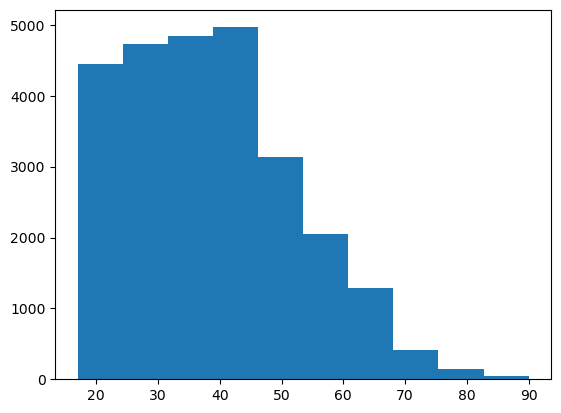

In [21]:
import matplotlib.pyplot as plt
plt.hist(X_train['age'])

(array([1.0517e+04, 1.2250e+04, 2.7950e+03, 3.7900e+02, 7.8000e+01,
        1.3000e+01, 7.0000e+00, 5.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([  12285.,  159527.,  306769.,  454011.,  601253.,  748495.,
         895737., 1042979., 1190221., 1337463., 1484705.]),
 <BarContainer object of 10 artists>)

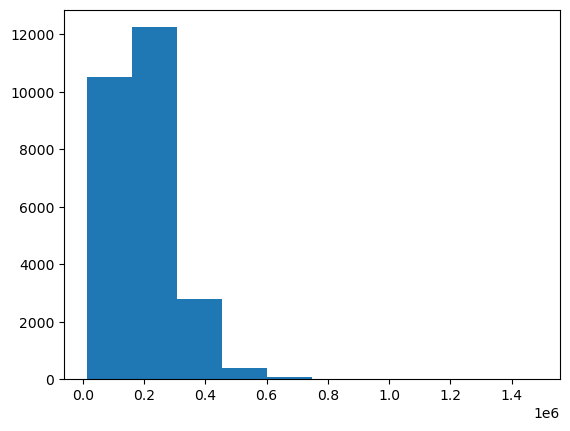

In [22]:
plt.hist(X_train['fnlwgt'])

(array([2.5428e+04, 4.1900e+02, 7.4000e+01, 4.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2100e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <BarContainer object of 10 artists>)

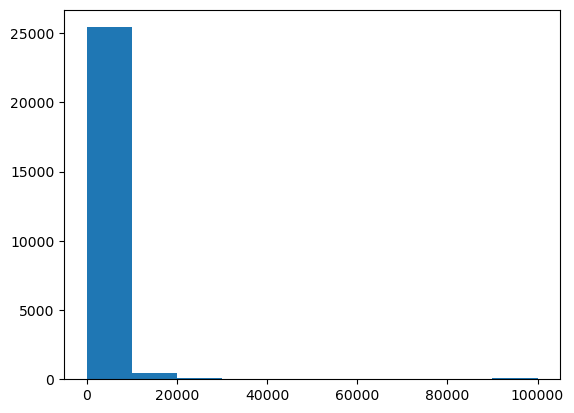

In [23]:
# Look how bad this is skewed. We may not want to use Min-Max or Standard Scalar.
plt.hist(X_train['capital_gain'])

(array([2.4826e+04, 1.6000e+01, 1.7000e+01, 3.8700e+02, 6.2500e+02,
        1.5800e+02, 1.1000e+01, 0.0000e+00, 6.0000e+00, 2.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <BarContainer object of 10 artists>)

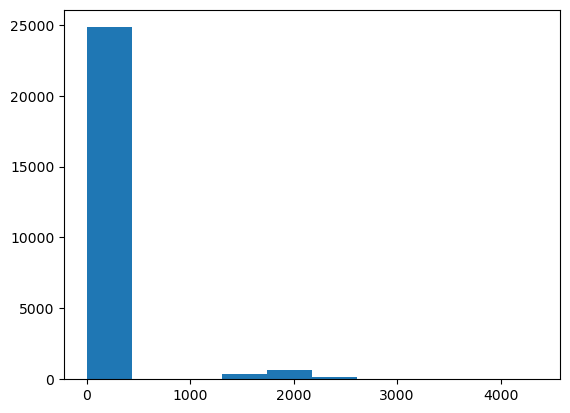

In [24]:
plt.hist(X_train['capital_loss'])

(array([  594.,  1743.,  1860., 14264.,  2451.,  3098.,  1409.,   352.,
          169.,   108.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

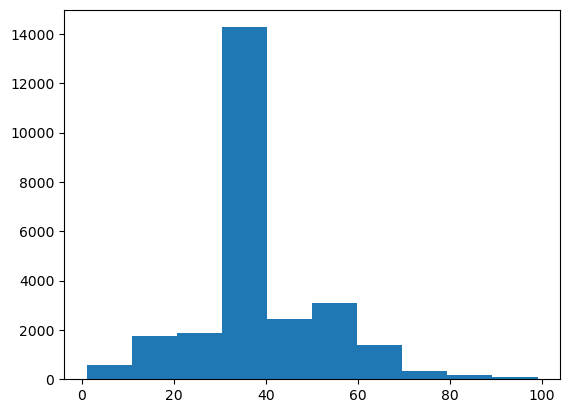

In [25]:
plt.hist(X_train['hours_per_week'])

In [26]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [27]:
X_test.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [28]:
# Impute categorical missing values with mode
# For both train and test datasets
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_train_features_imputed = imputer.fit_transform(X_train)
X_train_features_imputed

# IMPORTANT: Notice how we only transform here and not fit transform.
X_test_features_imputed = imputer.transform(X_test)
X_test_features_imputed

array([[27, ' Private', 160178, ..., 0, 38, ' United-States'],
       [45, ' State-gov', 50567, ..., 0, 40, ' United-States'],
       [29, ' Private', 185908, ..., 0, 55, ' United-States'],
       ...,
       [47, ' Private', 354148, ..., 0, 48, ' United-States'],
       [27, ' Private', 43652, ..., 0, 40, ' United-States'],
       [18, ' Private', 25837, ..., 0, 25, ' United-States']],
      dtype=object)

In [29]:
# This tells us the mode for each variable, since our imputer is the mode.
most_frequent_values = imputer.statistics_
most_frequent_values

array([28, ' Private', 203488, ' HS-grad', 9, ' Married-civ-spouse',
       ' Prof-specialty', ' Husband', ' White', ' Male', 0, 0, 40,
       ' United-States'], dtype=object)

In [30]:
# Notice that this is an ndarray, let's change it to a dataframe.
type(X_train_features_imputed)

numpy.ndarray

In [31]:
X_train_features_imputed = pd.DataFrame(X_train_features_imputed)
X_train_features_imputed.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [32]:
X_test_features_imputed = pd.DataFrame(X_test_features_imputed)
X_test_features_imputed.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [33]:
# Notice how our columns are missing
X_train_features_imputed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,33,Local-gov,198183,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States
1,36,Private,86459,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,50,United-States
2,58,Self-emp-not-inc,203039,9th,5,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States
3,21,Private,180190,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,46,United-States
4,27,Private,279872,Some-college,10,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,47,Private,359461,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
26044,31,Private,147215,12th,8,Divorced,Other-service,Unmarried,White,Female,0,0,21,United-States
26045,18,Private,216284,11th,7,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States
26046,50,Self-emp-not-inc,54261,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,84,United-States


In [34]:
# Let's fix the missing column names.
X_train_features_imputed.columns = X_train.columns
X_train_features_imputed

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,33,Local-gov,198183,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States
1,36,Private,86459,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,50,United-States
2,58,Self-emp-not-inc,203039,9th,5,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States
3,21,Private,180190,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,46,United-States
4,27,Private,279872,Some-college,10,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,47,Private,359461,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
26044,31,Private,147215,12th,8,Divorced,Other-service,Unmarried,White,Female,0,0,21,United-States
26045,18,Private,216284,11th,7,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States
26046,50,Self-emp-not-inc,54261,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,84,United-States


In [35]:
# Make sure to also adjust our test dataset.
X_test_features_imputed.columns = X_train.columns

In [36]:
X_test_features_imputed

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States
1,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
2,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States
3,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States
4,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,71,Private,269708,Bachelors,13,Divorced,Tech-support,Own-child,White,Female,2329,0,16,United-States
6509,55,Local-gov,253062,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
6510,47,Private,354148,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,48,United-States
6511,27,Private,43652,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States


## Encoding Categories

`OneHotEncoder` is basically like dummy coding.

In [37]:
from sklearn.preprocessing import OneHotEncoder

# Concatenate train and test data. We should do this to keep the dummy codes consistent.
combined_data = pd.concat([X_train_features_imputed[categorical], X_test_features_imputed[categorical]], axis=0)

# Recall that if the data type is 'object' then the feature is categorical.
# Numerical data will have data types like 'int64' or 'float64'.
categorical_columns = combined_data.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the encoder on the combined data
encoded_data = encoder.fit_transform(combined_data[categorical_columns])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Split back into train and test data since we concatonated at the beginning.
train_data_encoded = encoded_df[:len(X_train_features_imputed[categorical])]
test_data_encoded = encoded_df[len(X_train_features_imputed[categorical]):]

In [38]:
# Look at our dummy coded categorical variables.
train_data_encoded

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26044,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26045,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26046,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
# Look at the dummy variables for our test data also.
test_data_encoded

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
26048,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26049,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26050,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26051,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26052,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [40]:
# Since we have dummy coded the categorical variables, we don't need them anymore. Drop them.
X_train_features_encoded = X_train_features_imputed.drop(categorical,axis=1)
X_train_features_encoded

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
0,33,198183,0,0,50
1,36,86459,0,1887,50
2,58,203039,0,0,40
3,21,180190,0,0,46
4,27,279872,0,0,40
...,...,...,...,...,...
26043,47,359461,0,0,40
26044,31,147215,0,0,21
26045,18,216284,0,0,20
26046,50,54261,0,0,84


In [41]:
# Also drop them for the test dataset.
X_test_features_encoded = X_test_features_imputed.drop(categorical,axis=1)
X_test_features_encoded

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
0,27,160178,0,0,38
1,45,50567,0,0,40
2,29,185908,0,0,55
3,30,190040,0,0,40
4,29,189346,2202,0,50
...,...,...,...,...,...
6508,71,269708,2329,0,16
6509,55,253062,0,0,40
6510,47,354148,99999,0,48
6511,27,43652,0,0,40


In [42]:
test_data_encoded = test_data_encoded.reset_index(drop=True)
test_data_encoded

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6509,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6510,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6511,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
df_final_train = pd.concat([X_train_features_encoded,train_data_encoded],axis=1)
df_final_train

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,33,198183,0,0,50,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,36,86459,0,1887,50,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,58,203039,0,0,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,21,180190,0,0,46,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,27,279872,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,47,359461,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26044,31,147215,0,0,21,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26045,18,216284,0,0,20,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26046,50,54261,0,0,84,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
test_data_encoded = test_data_encoded.reset_index(drop=True)
test_data_encoded

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6509,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6510,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6511,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
df_final_test = pd.concat([X_test_features_encoded,test_data_encoded],axis=1)
df_final_test

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,27,160178,0,0,38,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,45,50567,0,0,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,29,185908,0,0,55,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,30,190040,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,29,189346,2202,0,50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,71,269708,2329,0,16,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6509,55,253062,0,0,40,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6510,47,354148,99999,0,48,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6511,27,43652,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Standardization for Continuous Variables

In [46]:
# Standardization for both train and test datasets
# We use RobustScaler since the outliers were insanely extreme.
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_features_train = scaler.fit_transform(df_final_train[continuous])

scaled_features_df_train = pd.DataFrame(scaled_features_train, columns=df_final_train[continuous].columns)

# IMPORTANT: Do not use the fit_transform for test dataset. Only for the train dataset.
scaled_features_test = scaler.transform(df_final_test[continuous])

scaled_features_df_test = pd.DataFrame(scaled_features_test, columns=df_final_test[continuous].columns)

In [47]:
df_final_train2 = df_final_train.drop(continuous,axis=1)
df_final_train2 = pd.concat([df_final_train2,scaled_features_df_train],axis=1)
df_final_test2 = df_final_test.drop(continuous,axis=1)
df_final_test2 = pd.concat([df_final_test2,scaled_features_df_test],axis=1)

In [48]:
#do not change the datasets from here on.
#We only have two datasets here - df_final_train2 and df_final_test2

## Hold-Out Validation

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
y_train

5514     1
19777    1
10781    0
32240    0
9876     0
        ..
29802    0
5390     0
860      0
15795    0
23654    0
Name: income_binary, Length: 26048, dtype: int64

In [58]:
# Hold-Out Validation (In Cross Validation, we don't need to do this since it does it automatically.)
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(df_final_train2, y_train, test_size=0.3, random_state=42)

In [59]:
#gnb = SVC(kernel='rbf', C=1.0, gamma='scale') 
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [60]:
y_pred = gnb.predict(X_valid)
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [61]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_valid, y_pred)))

Model accuracy score: 0.7855


## Cross-Validation

In [62]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(gnb, df_final_train2, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate the mean score
mean_score = scores.mean()
print("Mean cross-validation score:", mean_score)

Cross-validation scores: [0.7950096  0.80441459 0.80172745 0.79804185 0.79880975]
Mean cross-validation score: 0.7996006468945488


In [ ]:
#further steps
#hyperparameter tuning
#report your cross-validation scores

In [ ]:
#once your hyperparameters are set, fit your model on the test dataset

In [63]:
y_test_pred = gnb.predict(df_final_test2)
y_test_pred

array([0, 1, 1, ..., 1, 0, 0])

In [64]:
print("Test Accuracy Score: {0:0.4f}".format(accuracy_score(y_test, y_test_pred)))

Test Accuracy Score: 0.8033
